In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
Anu_df = pd.read_csv("AnuResources/sample_no_outliers.csv")
Anu_df.head(5)

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2005-07-09,9,1,1,1,1,424,3,1,40900.0,...,3,0,2,1,6585.0,70.16,75200.0,110.94,1352.0,1612.0
1,2005-07-09,2,1,1,3,1,153,3,4,18880.0,...,0,0,2,1,8152.0,22.46,67300.0,96.86,2404.0,3345.0
2,2005-07-09,9,1,1,3,1,56,3,3,21780.0,...,0,3,2,1,7388.0,4.24,65500.0,120.10,2651.0,2999.0
3,2005-07-09,7,1,1,3,1,207,3,1,31700.0,...,1,0,2,1,6993.0,3.15,87200.0,107.98,2168.0,2732.0
4,2005-07-09,7,1,1,1,1,424,3,4,33124.0,...,0,0,2,1,4775.0,67.64,51800.0,219.02,1305.0,1448.0


In [3]:
#Droping rows are 2 (Home improvement)in column "loan_purpose"
#Anu1_df = Anu_df.drop(Anu_df.index[Anu_df['loan_purpose'] == '2'], inplace = True)
Anu1_df = Anu_df[Anu_df['loan_purpose']!=2]
#Anu1_df.head(20)
Anu1_df.head(5)

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2005-07-09,9,1,1,1,1,424,3,1,40900.0,...,3,0,2,1,6585.0,70.16,75200.0,110.94,1352.0,1612.0
1,2005-07-09,2,1,1,3,1,153,3,4,18880.0,...,0,0,2,1,8152.0,22.46,67300.0,96.86,2404.0,3345.0
2,2005-07-09,9,1,1,3,1,56,3,3,21780.0,...,0,3,2,1,7388.0,4.24,65500.0,120.10,2651.0,2999.0
3,2005-07-09,7,1,1,3,1,207,3,1,31700.0,...,1,0,2,1,6993.0,3.15,87200.0,107.98,2168.0,2732.0
4,2005-07-09,7,1,1,1,1,424,3,4,33124.0,...,0,0,2,1,4775.0,67.64,51800.0,219.02,1305.0,1448.0


In [4]:
Anu2_df = Anu1_df[Anu_df['applicant_income_000s'].notna()]
Anu2_df.head(5)

C:\Users\victor\AppData\Local\Temp\ipykernel_7020\3416722745.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Anu2_df = Anu1_df[Anu_df['applicant_income_000s'].notna()]


,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2005-07-09,9,1,1,1,1,424,3,1,40900.0,...,3,0,2,1,6585.0,70.16,75200.0,110.94,1352.0,1612.0
1,2005-07-09,2,1,1,3,1,153,3,4,18880.0,...,0,0,2,1,8152.0,22.46,67300.0,96.86,2404.0,3345.0
2,2005-07-09,9,1,1,3,1,56,3,3,21780.0,...,0,3,2,1,7388.0,4.24,65500.0,120.10,2651.0,2999.0
3,2005-07-09,7,1,1,3,1,207,3,1,31700.0,...,1,0,2,1,6993.0,3.15,87200.0,107.98,2168.0,2732.0
4,2005-07-09,7,1,1,1,1,424,3,4,33124.0,...,0,0,2,1,4775.0,67.64,51800.0,219.02,1305.0,1448.0


In [5]:
income_df = Anu2_df[['action_taken','applicant_income_000s']]
income_df.head(10)

,action_taken,applicant_income_000s
0,1,142.0
1,4,57.0
2,3,108.0
3,1,87.0
4,4,156.0
7,6,367.0
10,4,132.0
11,1,76.0
12,1,90.0
14,1,134.0


In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



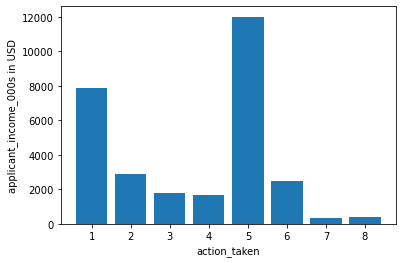

In [7]:
plt.bar(income_df.action_taken, income_df.applicant_income_000s)
plt.xlabel('action_taken')
plt.ylabel('applicant_income_000s in USD')
plt.show()

In [8]:
Anu2_df.describe()['applicant_income_000s']

count    19803.000000
mean       104.882897
std        146.249803
min          1.000000
25%         51.000000
50%         79.000000
75%        123.000000
max      12000.000000
Name: applicant_income_000s, dtype: float64

In [14]:
def GetCountGraph(df, application_outcome, outcome_keys):
    # Setting the ranges for our income bands
    bins = [0, 40, 70, 100, 250, 500, 12000]
    # Creating labels for our ranges
    labels = ['0-$40k', '$40k-70k', '$70k-$100k', '$100k-$250k', '$250k-$500k', '$500k+']
    # Create the income bins
    df['income_band']= pd.cut(x=df['applicant_income_000s'], bins=bins, labels=labels)
    ####print(pd.cut(x=df['applicant_income_000s'], bins=bins, labels=labels))
    # Create a map so we can order our x-ticks in the graph
    label_order_dict = {'0-$40k':0,
                        '$40k-70k':1, 
                        '$70k-$100k':2, 
                        '$100k-$250k':3, 
                        '$250k-$500k':4, 
                        '$500k+':5}

    # Create a numerical column that holds the order of the income bands
    df['income_band_order'] = df['income_band'].map(label_order_dict)
    ####print(df['income_band_order'])
    # Subset data for the desired application outcome
    approvals_df = df[df['action_taken'].isin(outcome_keys)]

    # Getting counts of applications per income band
    counts_df = pd.DataFrame(approvals_df['income_band_order'].value_counts())
    #print(counts_df)
    # Build a table for plotting
    plot_df = counts_df.reset_index()
    plot_df.columns = ['Income Band', f'# of {application_outcome}']
    plot_df = plot_df.sort_values(by = 'Income Band')
    
    #Add labels for the amounts
    # def addlabels(plot_df,x,y):
        # for i in x.index:
        #     #print(i,y[i])
        #     plt.text(i, y[i], y[i], ha = 'center')


    # Plotting
    fig, ax = plt.subplots();
    ax.bar(plot_df['Income Band'], plot_df[f'# of {application_outcome}']);
    ax.set_xticks([0,1,2,3,4,5], labels=labels);
    plt.title(f'Number of {application_outcome} by income level');
    plt.xticks(rotation = 45);
    plt.xlabel('Income Band');
    plt.ylabel(f'# of {application_outcome}');
    
    # addlabels(labels, plot_df[f'# of {application_outcome}']);

    for x, y in enumerate(plot_df[f'# of {application_outcome}']):
        ax.text(x-.25, y+3, str(y))
    
    plt.show();



C:\Users\victor\AppData\Local\Temp\ipykernel_7020\944371850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_band']= pd.cut(x=df['applicant_income_000s'], bins=bins, labels=labels)
C:\Users\victor\AppData\Local\Temp\ipykernel_7020\944371850.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_band_order'] = df['income_band'].map(label_order_dict)


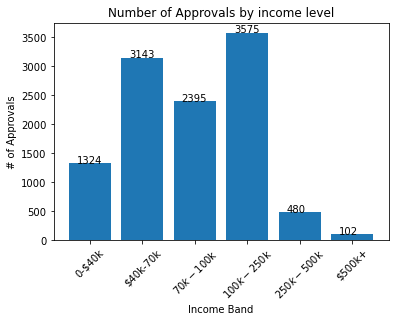

In [15]:
GetCountGraph(Anu2_df, 'Approvals', [1])

C:\Users\victor\AppData\Local\Temp\ipykernel_7020\944371850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_band']= pd.cut(x=df['applicant_income_000s'], bins=bins, labels=labels)
C:\Users\victor\AppData\Local\Temp\ipykernel_7020\944371850.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_band_order'] = df['income_band'].map(label_order_dict)


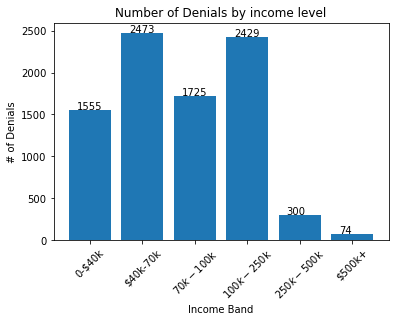

In [11]:
GetCountGraph(Anu2_df, 'Denials', [2,3,4,5,6])